# Red Wine Quality

In [ ]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# unzip the file
!unzip -qq '/content/archive (6).zip'

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#read csv file using pandas
data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
# convert csv-file to pandas DataFrame
df = pd.DataFrame(data)
df.head()     # see head of DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# check-- is there any null value in the DataFrame
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# see the info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# see all the statistics of numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualizations

In [ ]:
# define a function to perform countplot on different columns of the DataFrame
def count_plot(column_data, column_name):
  plt.figure(figsize=(5,5))
  sns.countplot(x = column_data)
  plt.title(f'Distribution of {column_name}')

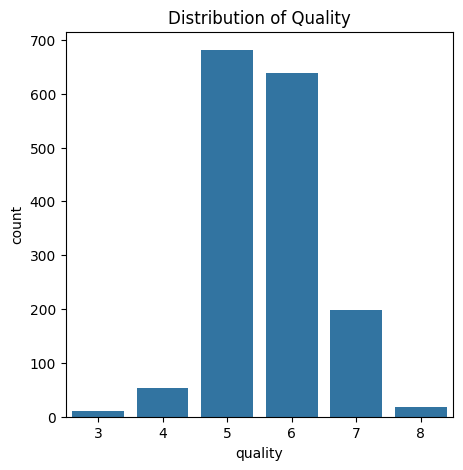

In [ ]:
count_plot(df['quality'], 'Quality')

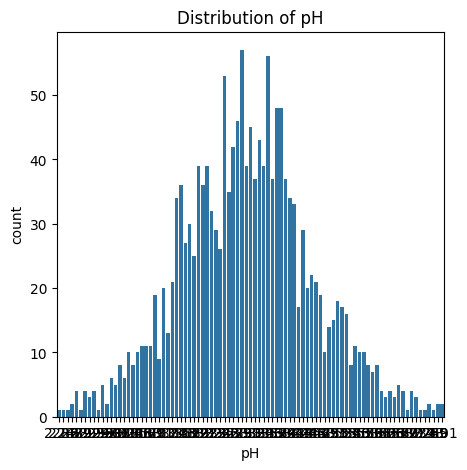

In [ ]:
count_plot(df['pH'], 'pH')

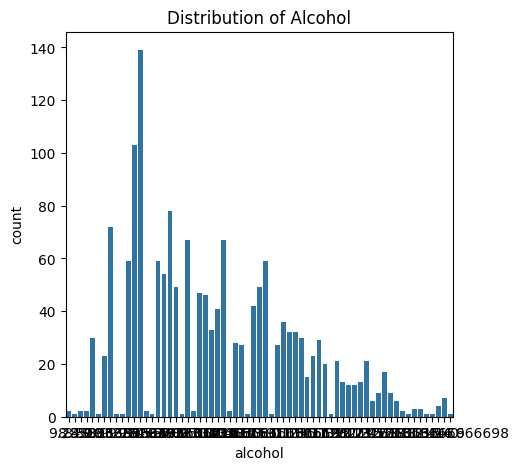

In [ ]:
count_plot(df['alcohol'], 'Alcohol')

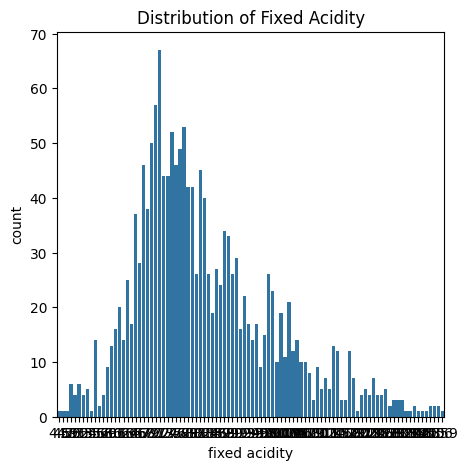

In [ ]:
count_plot(df['fixed acidity'], 'Fixed Acidity')

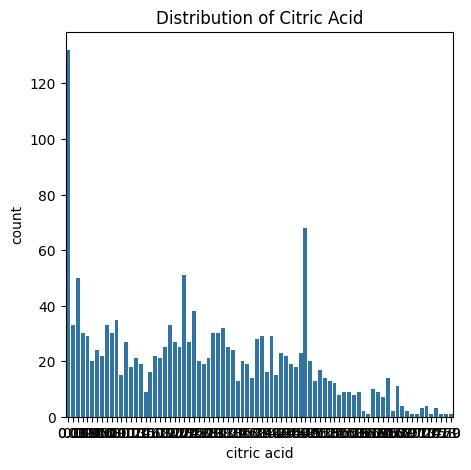

In [ ]:
count_plot(df['citric acid'], 'Citric Acid')

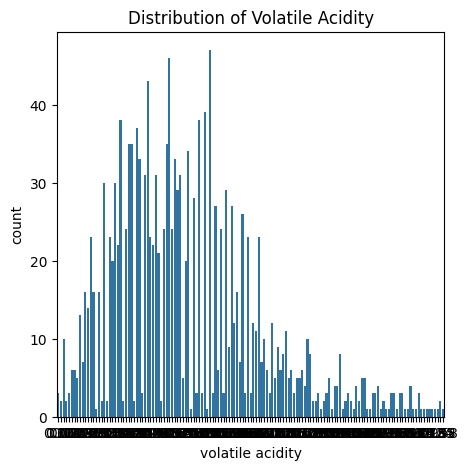

In [ ]:
count_plot(df['volatile acidity'], 'Volatile Acidity')

<Axes: xlabel='quality', ylabel='Density'>

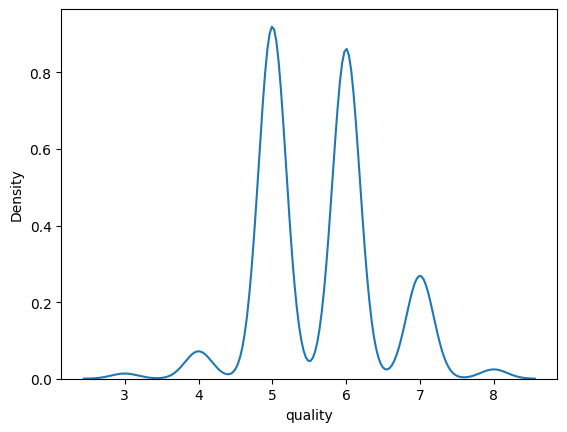

In [ ]:
sns.kdeplot(df.query('quality > 2').quality)

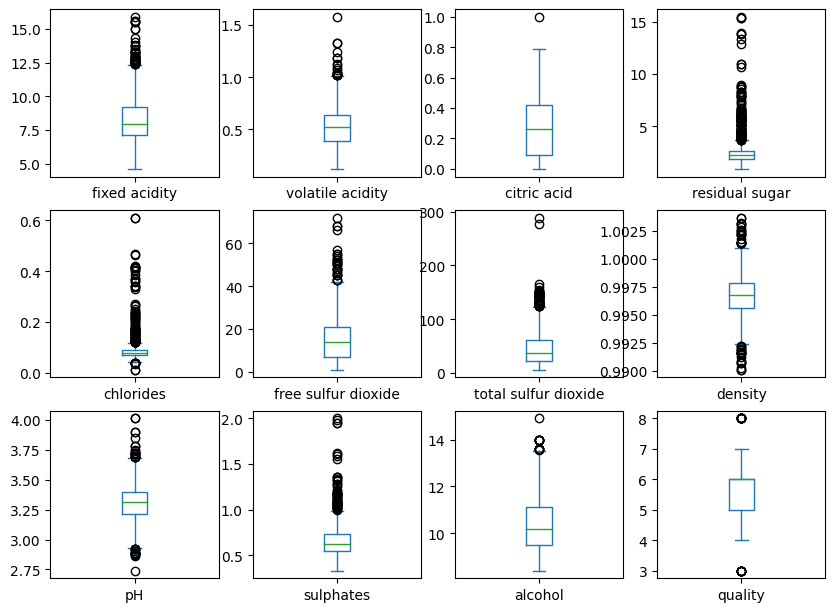

In [ ]:
# box plot of the DataFrame for each column
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10))
plt.show()

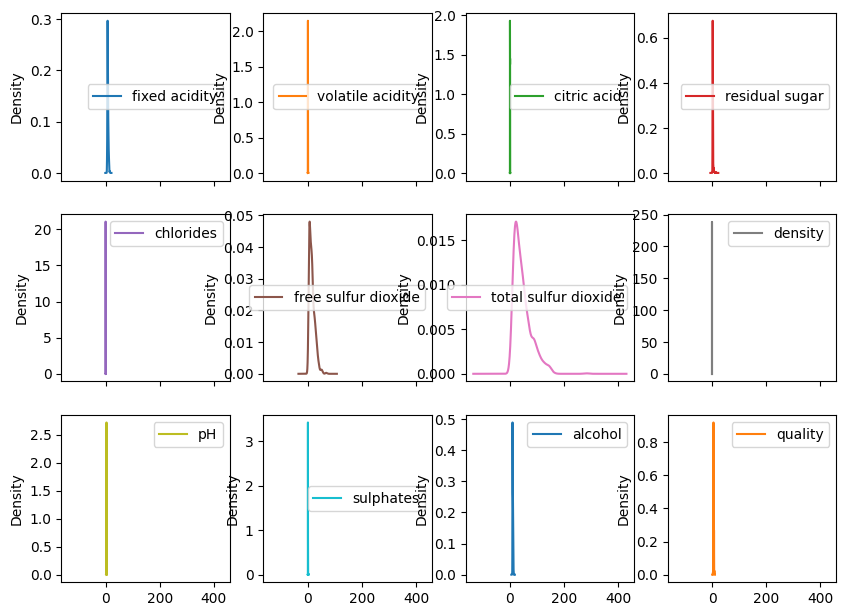

In [ ]:
# density plot of DataFrame for each column
df.plot(kind='density', subplots= True, layout=(4,4), figsize=(10,10))
plt.show()

<Axes: >

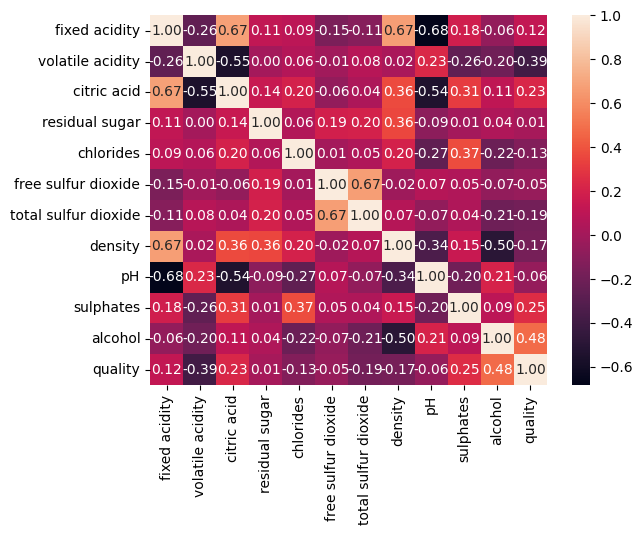

In [ ]:
# Correlation of the DataFrame
corr= df.corr()
# plot a heatmap of the correlation
sns.heatmap(corr, annot= True, fmt='.2f')

## Data Preprocessing

In [ ]:
# see all the unique values of Quality column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# convert target variable to binary
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)       # if value of quality is 7 or more make it 1; else 0
df.rename(columns={'quality' : 'good-quality'}, inplace= True)          # change the name of column "Quality" to "Good Quality"

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Training

In [ ]:
# seperate X & y
X = df.drop('good-quality', axis=1)
y = df['good-quality']

In [ ]:
# split the data into training & testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [ ]:
# model training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# model prediction
y_pred = model.predict(X_test)

In [ ]:
# model testing
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_pred, y_test))

Accuracy Score: 0.9204545454545454
